

# About this project


This project was build as part of the Online Course "100 Days of Code - the complete Python Bootcamp" by AppBrewery.

Using data from Real Estate in Boston Massachusetts in the 1970s, I built a model that can provide a price estimate based on a multiple characteristics like:

* Number of rooms
* Distance to employment centers
* Crime rate in the area
* Number of students per teacher in the local schools etc.

###  Import Statements


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Changing float format for the whole Notebook for better readability

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [9]:
data = pd.read_excel('boston.xlsx', index_col=0)

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University ([original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


In [10]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  PRICE  
0   4.98   24.0  
1   9.14   21.6  
2   4.03   34.7  
3   2.94   33.4  
4   5.33   36.2

In [13]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

     LSTAT  PRICE  
501   9.67   22.4  
502   9.08   20.6  
503   5.64   23.9  
504   6.48   22.0  
505   7.88   11.9

Attribute Information (in order)
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \\$10,000
* PTRATIO  pupil-teacher ratio by town
* LSTAT    % lower status of the population
* PRICE     Median value of owner-occupied homes in $1000's
        

Creator: Harrison, D. and Rubinfeld, D.L



### Preliminary Data Exploration


In [11]:
data.shape

(506, 13)

In [12]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'PRICE'],
      dtype='object')

In [14]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
LSTAT      506
PRICE      506
dtype: int64

### Data Cleaning 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [16]:
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? False


In [17]:
print(f'Any duplicates? {data.duplicated().values.any()}')

Any duplicates? False


### Descriptive Statistics

In [21]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

            PRICE  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

### Visualising some of the features to get a better feeling for the data


#### House Prices
PRICE: The home price in thousands



C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


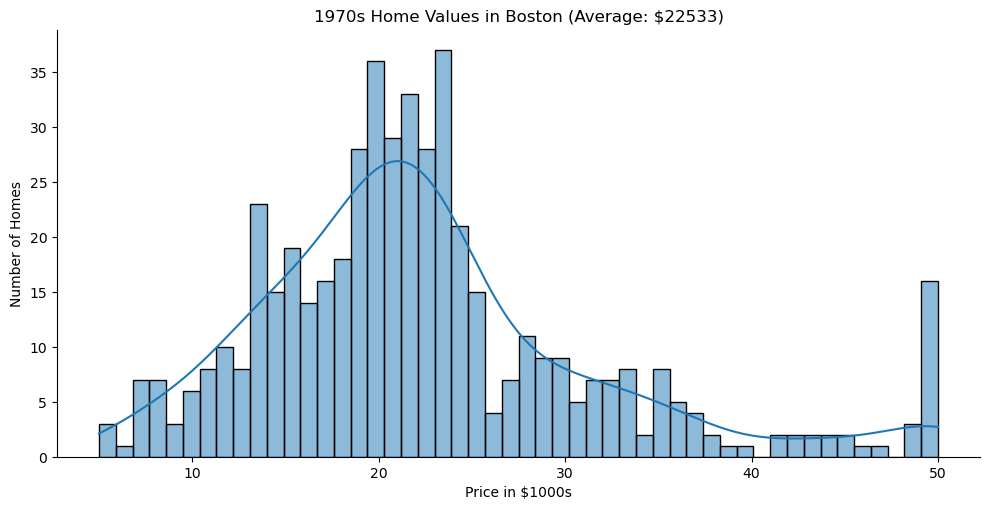

In [26]:
sns.displot(data['PRICE'], 
            bins=50, 
            aspect=2,
            kde=True)

plt.title(f'1970s Home Values in Boston (Average: ${(1000*data.PRICE.mean()):.0f})')
plt.xlabel('Price in $1000s')
plt.ylabel('Number of Homes')

plt.show()

The spike in the number of homes at the $50,000 mark is noteworthy. 
Other than that the distribution seems quite normal.

#### Distance to Employment - Length of Commute
DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.


C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



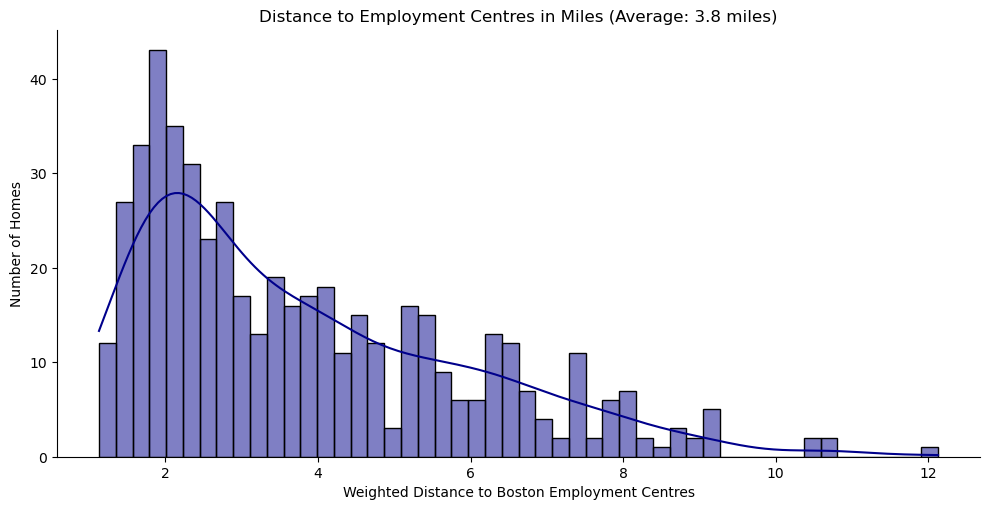

In [52]:
sns.displot(data['DIS'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Distance to Employment Centres in Miles (Average: {(data.DIS.mean()):.1f} miles)')
plt.xlabel('Weighted Distance to Boston Employment Centres')
plt.ylabel('Number of Homes')

plt.show()

Most homes are about 3.8 miles away from the main employment centers in Boston. There are fewer and fewer homes the further out we go.

#### Number of Rooms
RM: the average number of rooms per owner unit.

C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



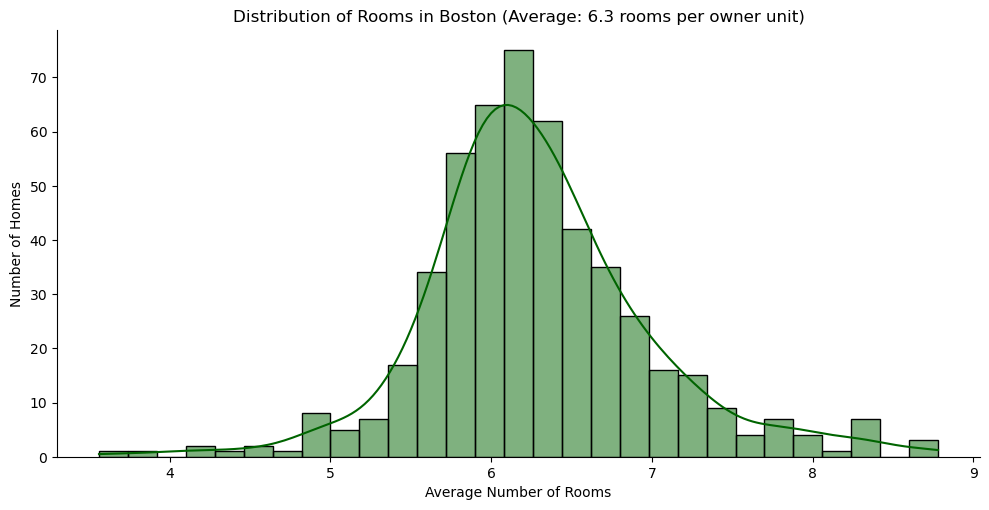

In [53]:
sns.displot(data["RM"], 
            aspect=2,
            kde=True, 
            color='darkgreen')

plt.title(f'Distribution of Rooms in Boston (Average: {data.RM.mean():.1f} rooms per owner unit)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Number of Homes')

plt.show()

Boston Homes in the 70s were unexpectedly large when it comes to number of rooms.

#### Access to Highways
RAD: the index of accessibility to highways. 

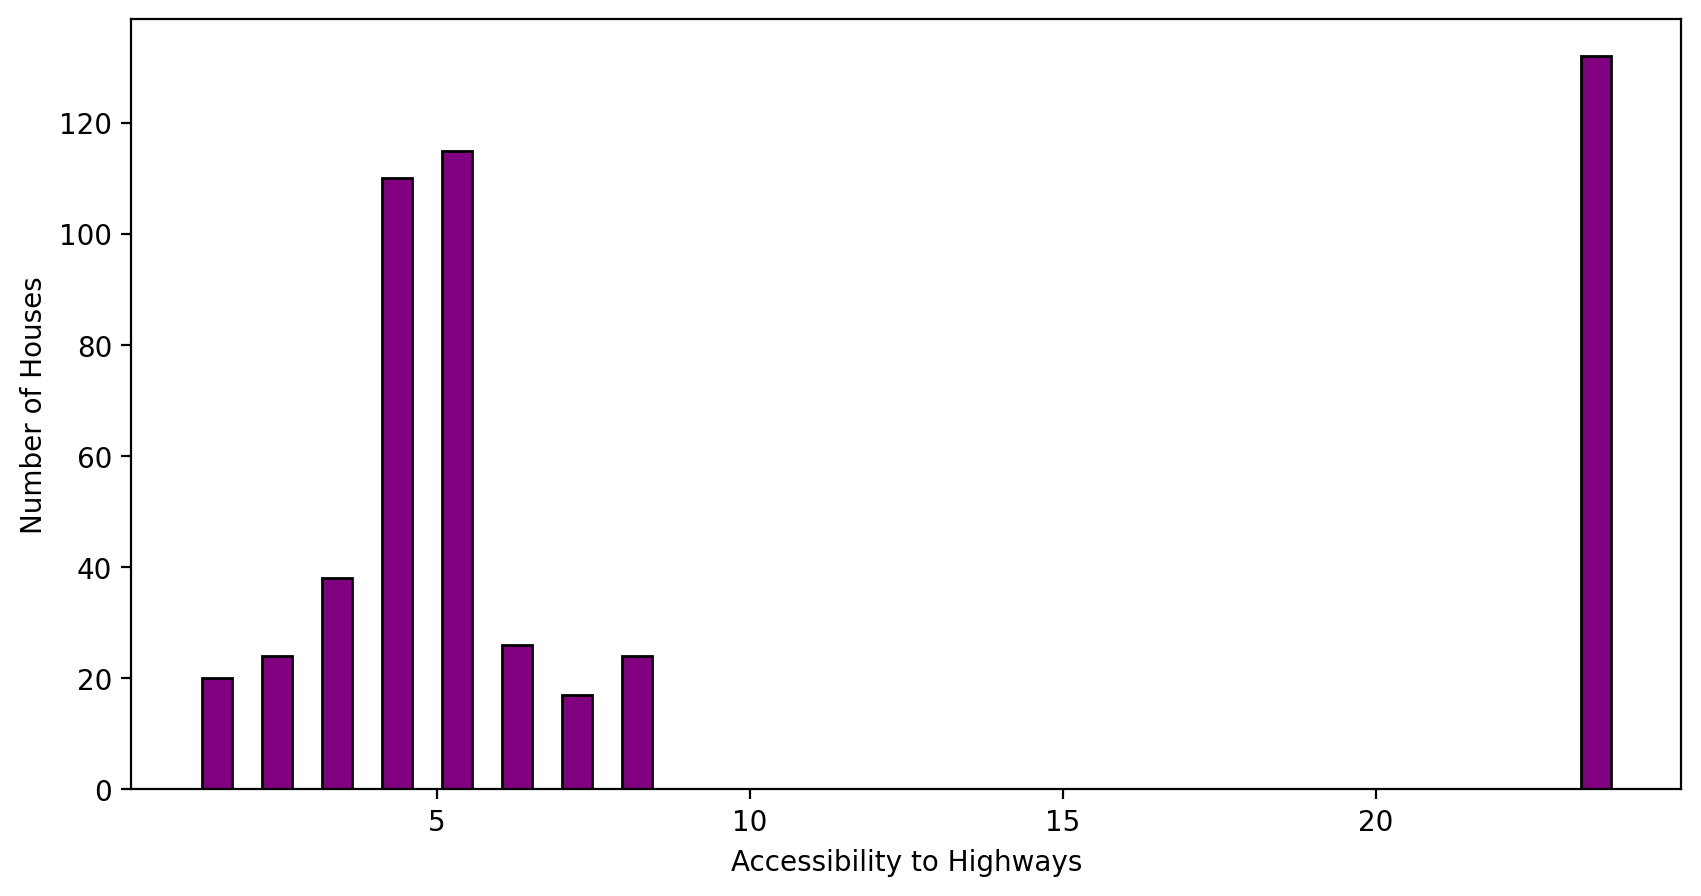

In [33]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['RAD'], 
         bins=24, 
         ec='black', 
         color='purple', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Number of Houses')
plt.show()

RAD is an index of accessibility to roads. Better access to a highway is represented by a higher number. Note the big gap in the values of the index.

#### How many homes are next to the Charles River?

CHAS: Charles River dummy variable (Boolean)

In [38]:
river_access = data['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             title='Homes next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

Out of the total number of 506 homes in the dataset, only 35 are located next to the Charles River. Will this impact the price?

### Looking for relationships in the Data

Some predictions/assumptions:

* The closer the Home to an Employment Center (DIS) the higher the PRICE and the higher the pollution (NOX)
* Homes in low income areas (high LSTAT) have less rooms (RM)
* Positive correlation between PRICE and number of rooms (RM)
* Negative correlation between PRICE and LSTAT (lower income percentage) and CRIM (crime rate) - higher prices in areas with lower crime and lower percentage of lower income households
* Positive correlation between RAD (access to highway) and PRICE (the better the access, the higher the price)

#### Correlation in numbers

In [39]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000  0.374044 -0.507787  
LSTAT   -0.496996  0.488676  0.543993  0.374044  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787 -0.737663  1.000000

#### Correlation in graphs
Double-click on graphs to zoom in

C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



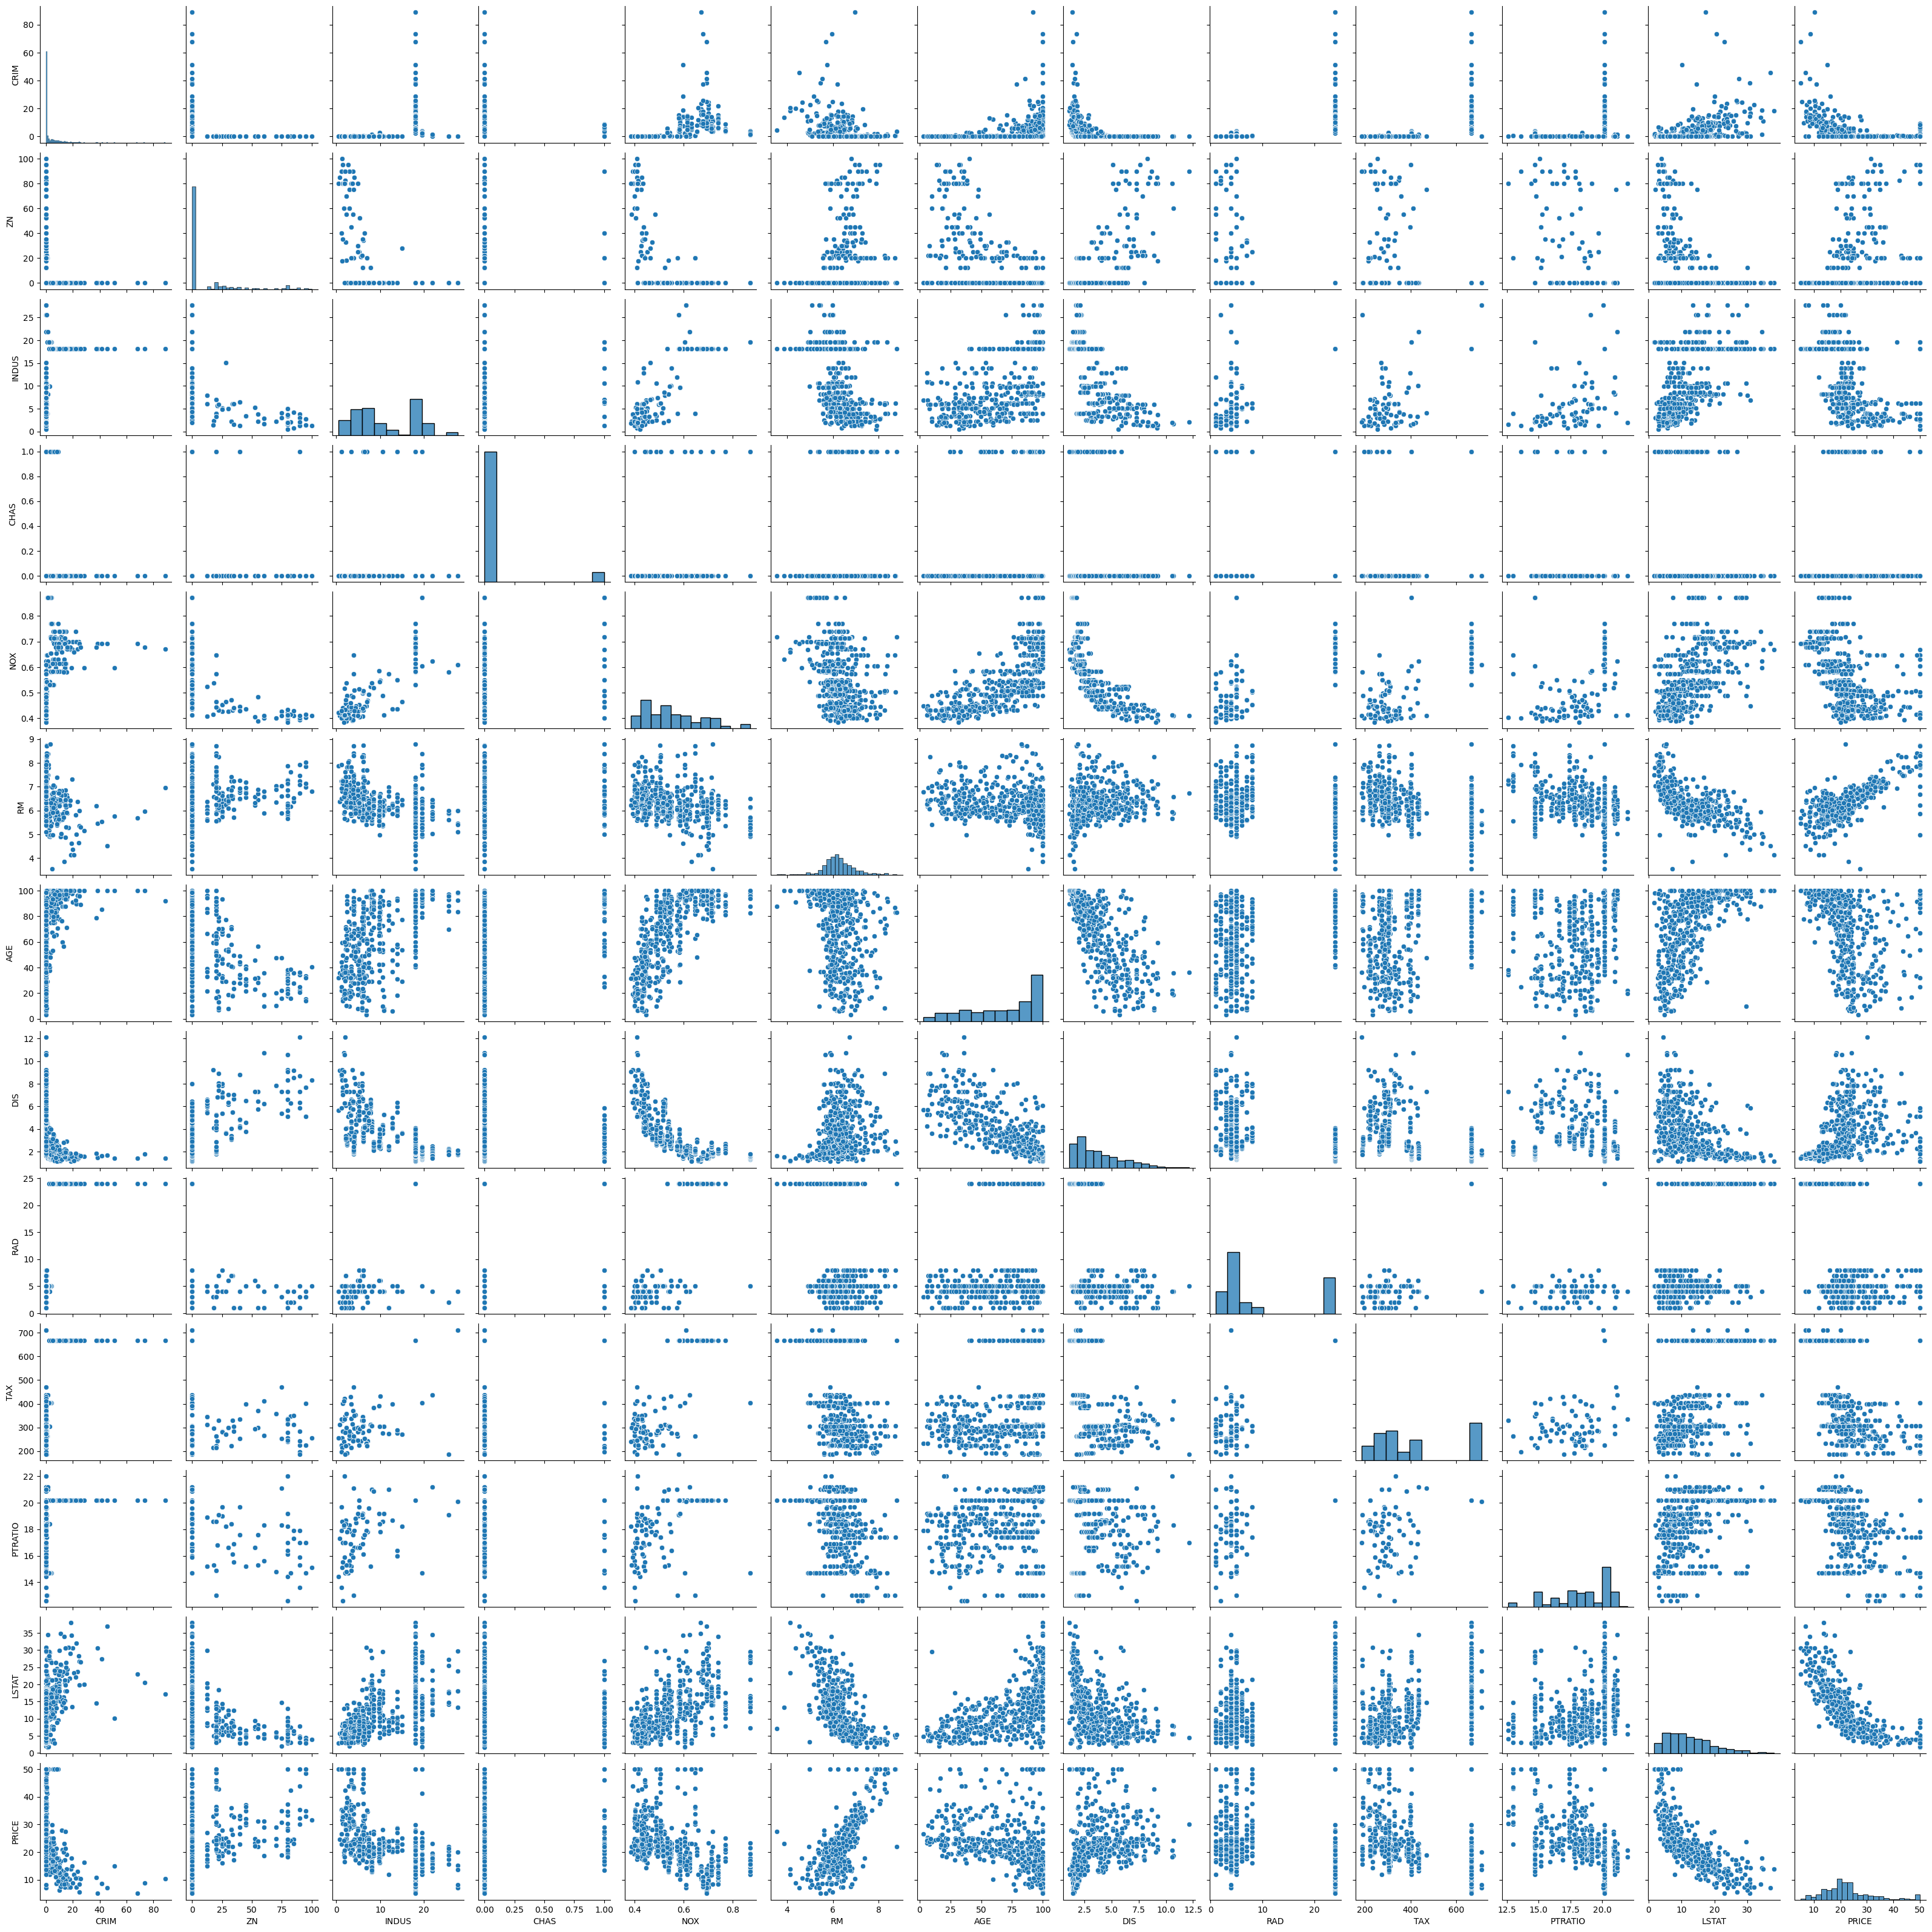

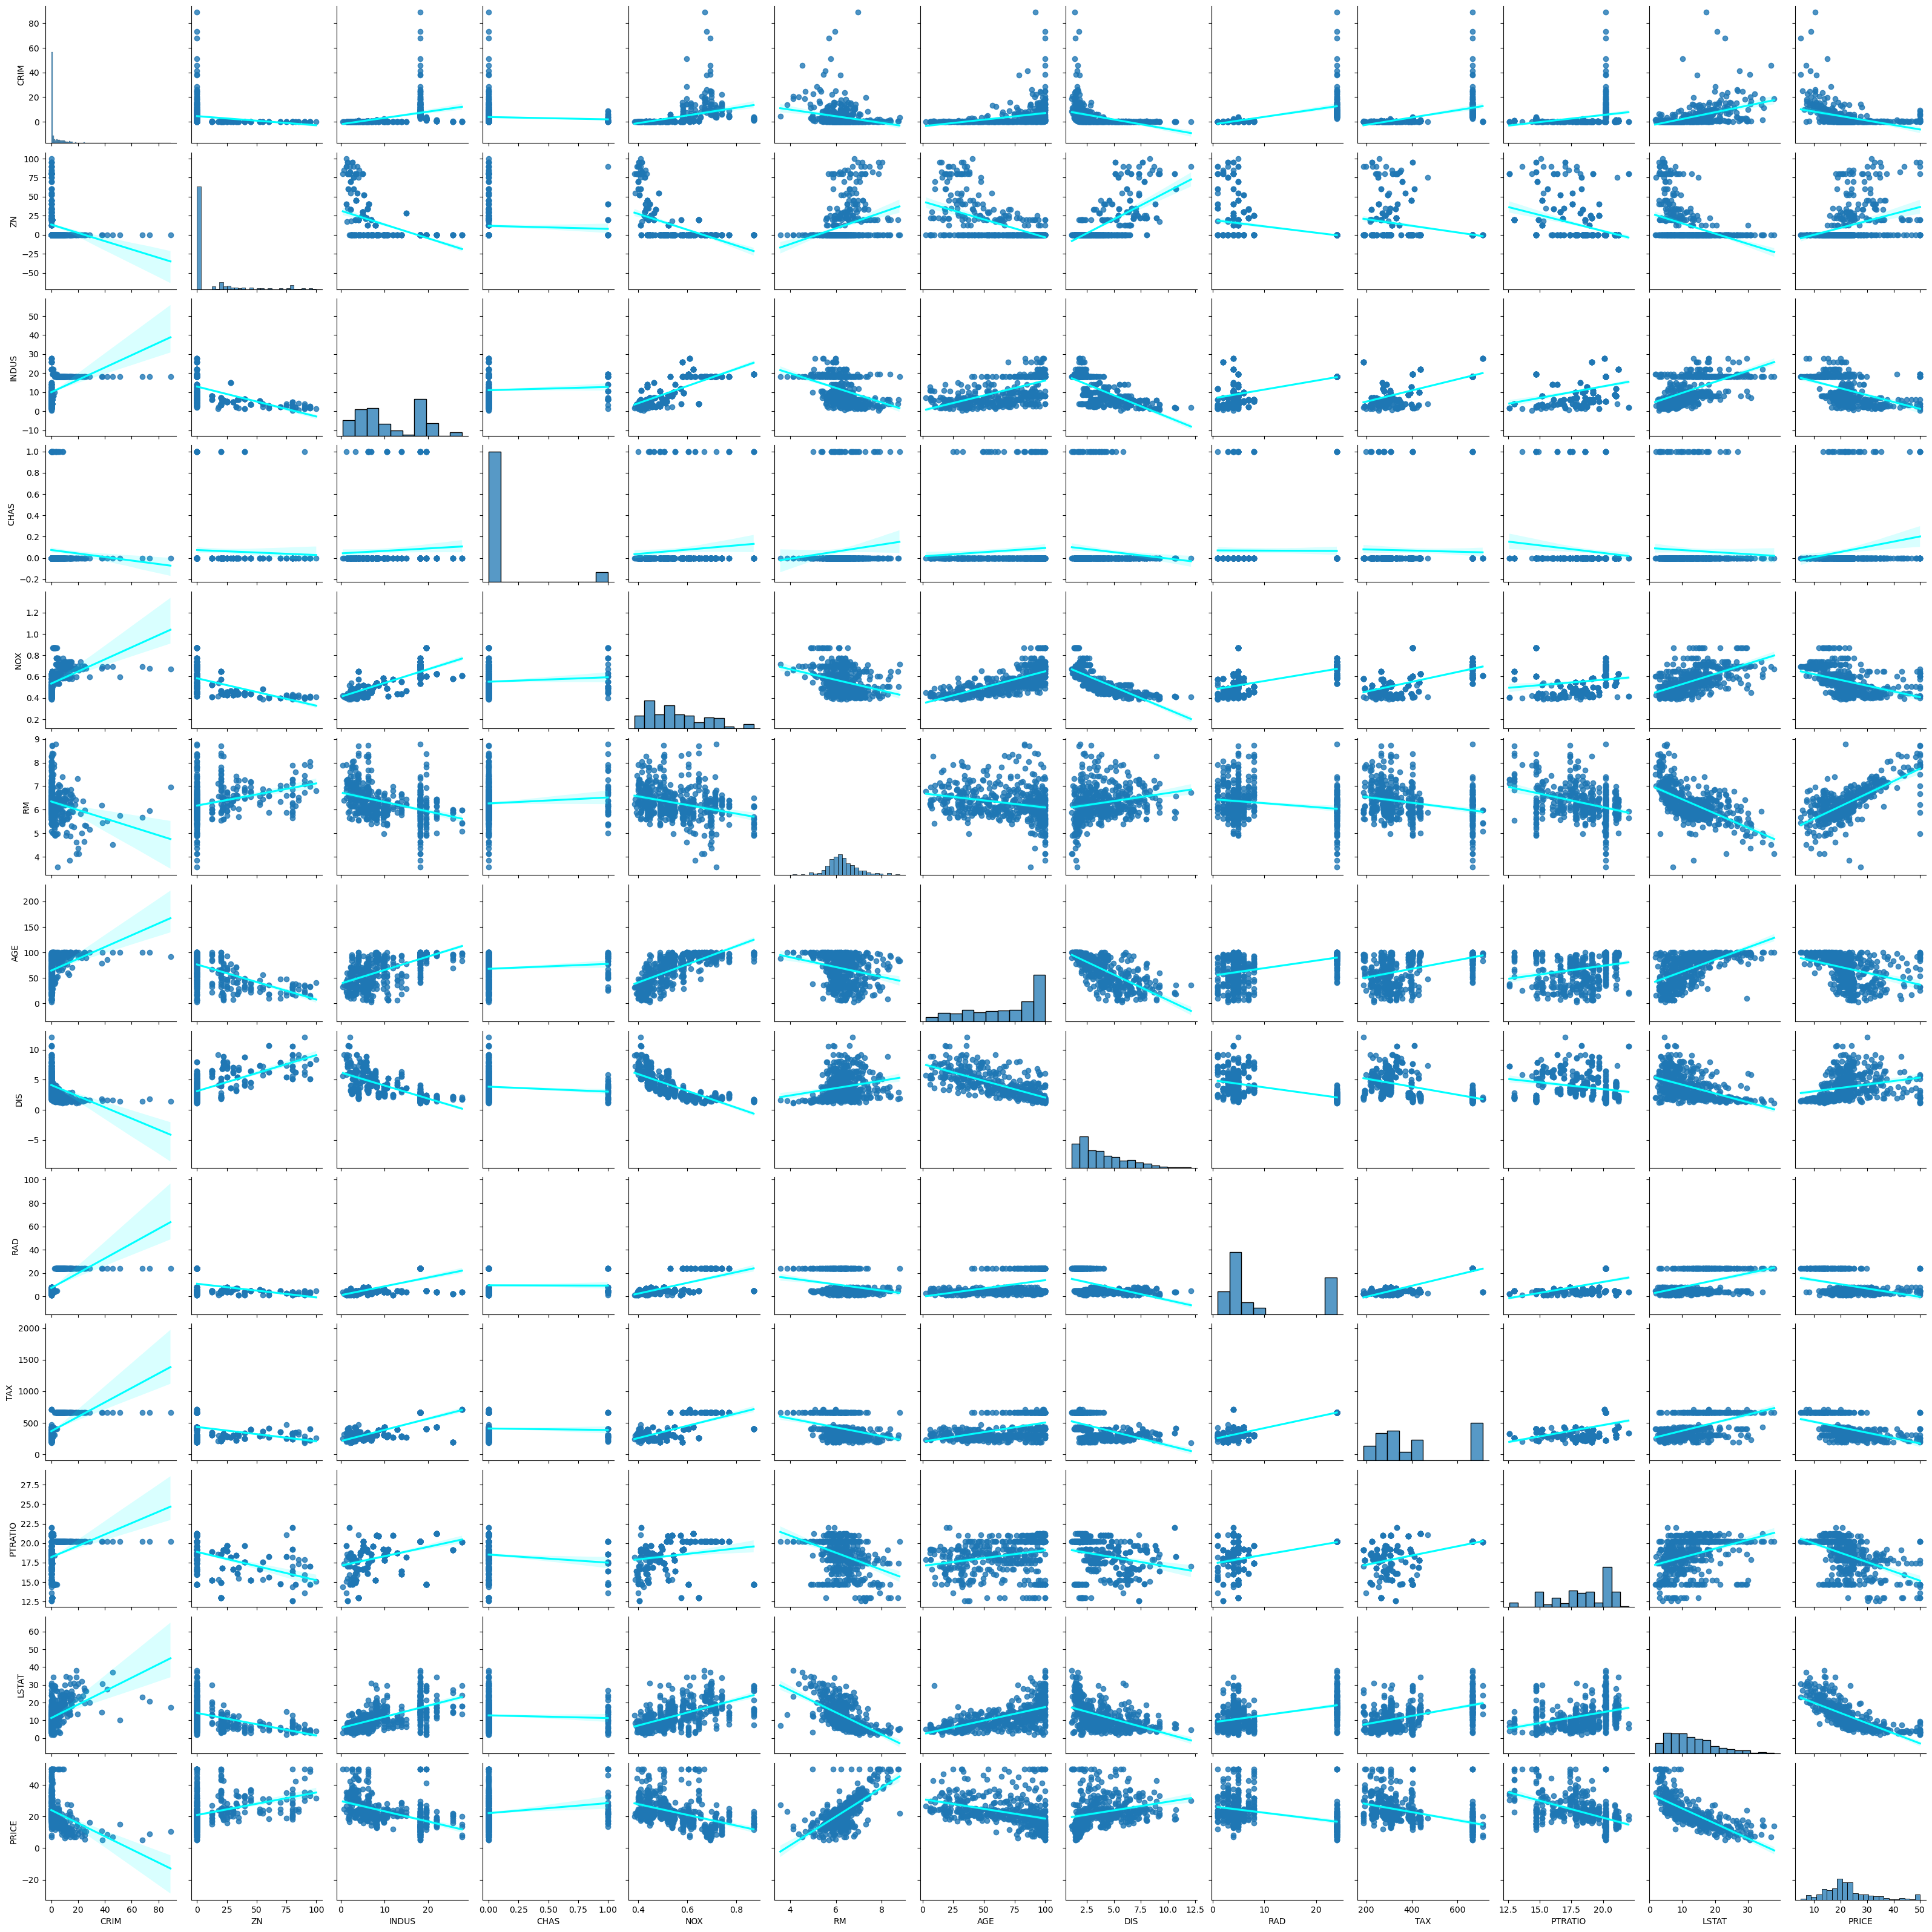

In [40]:
sns.pairplot(data)
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

#### Distance from Employment vs. Pollution
Does pollution go up or down as the distance to the employment centers increases? 

In [45]:
data[["DIS", "NOX"]].corr()

DIS      NOX
DIS  1.00000 -0.76923
NOX -0.76923  1.00000

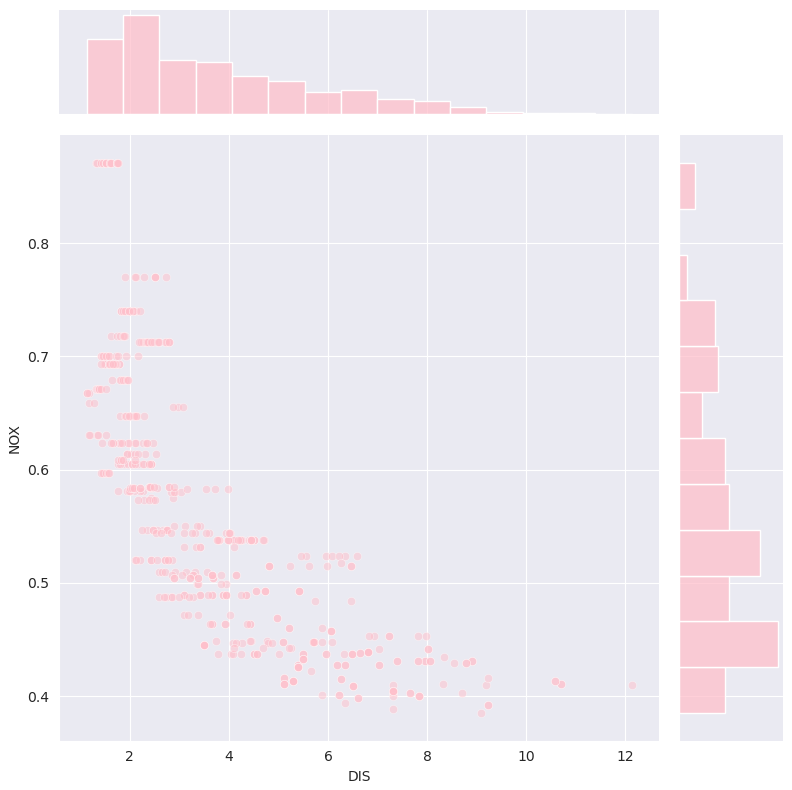

In [41]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['DIS'], 
                y=data['NOX'], 
                height=8, 
                kind='scatter',
                color='pink', 
                joint_kws={'alpha':0.5})

plt.show()

As expected, the pollution goes down as we got further away from the employment centers (negative correlation). However, the pollution levels vary a lot at the closer distances (e.g. 2 miles), while the levels of pollution are quite similar for father distance (9 miles to 12 miles). I assume the latter can be explained with a certain base level of pollution that is always around.


#### % of Lower Income Population vs. Average Number of Rooms

How does the number of rooms per home vary with the poverty of the area? Do homes have more or fewer rooms when LSTAT is low?

In [46]:
data[["LSTAT", "RM"]].corr()

LSTAT        RM
LSTAT  1.000000 -0.613808
RM    -0.613808  1.000000

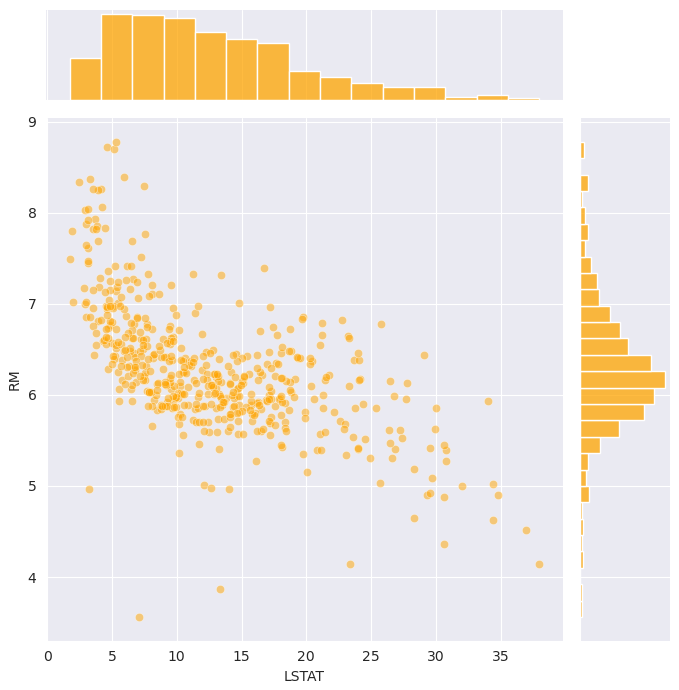

In [43]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['LSTAT'], 
                y=data['RM'], 
                # kind='hex', 
                height=7, 
                color='orange',
                joint_kws={'alpha':0.5})
plt.show()

In the top left corner we see that all the homes with 8 or more rooms, LSTAT is well below 10%. As expected there seems to be a moderate negative correlation between poverty of the area and number of rooms.

#### % of Lower Income Population versus Home Price

How does the proportion of the lower-income population in an area affect home prices?

In [47]:
data[["LSTAT", "PRICE"]].corr()

LSTAT     PRICE
LSTAT  1.000000 -0.737663
PRICE -0.737663  1.000000

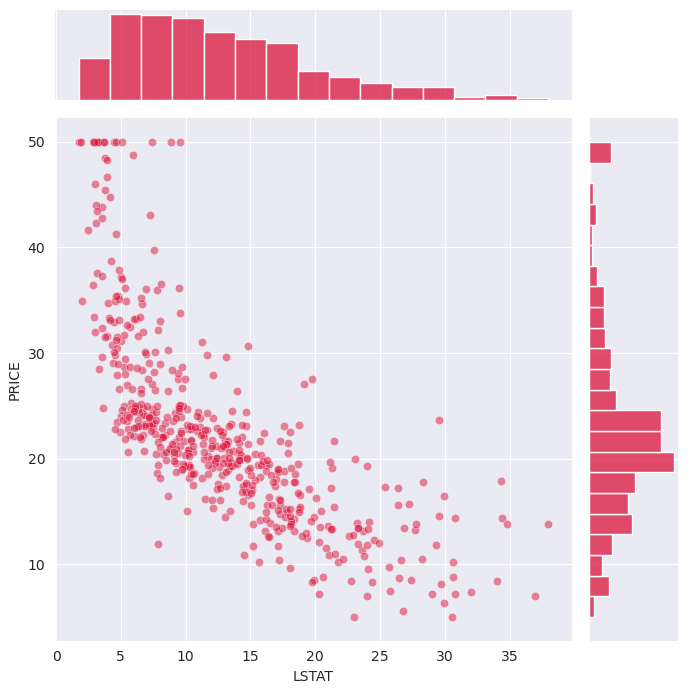

In [44]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.LSTAT, 
                y=data.PRICE, 
                height=7, 
                color='crimson',
                joint_kws={'alpha':0.5})
plt.show()

Again, as expected there is a moderate negative correlation between the Price and the Percentage of low income households.

#### Number of Rooms versus Home Price

The number of rooms should be one of the factors that have a positive correlation with the Home Price

In [48]:
data[["RM", "PRICE"]].corr()

RM    PRICE
RM     1.00000  0.69536
PRICE  0.69536  1.00000

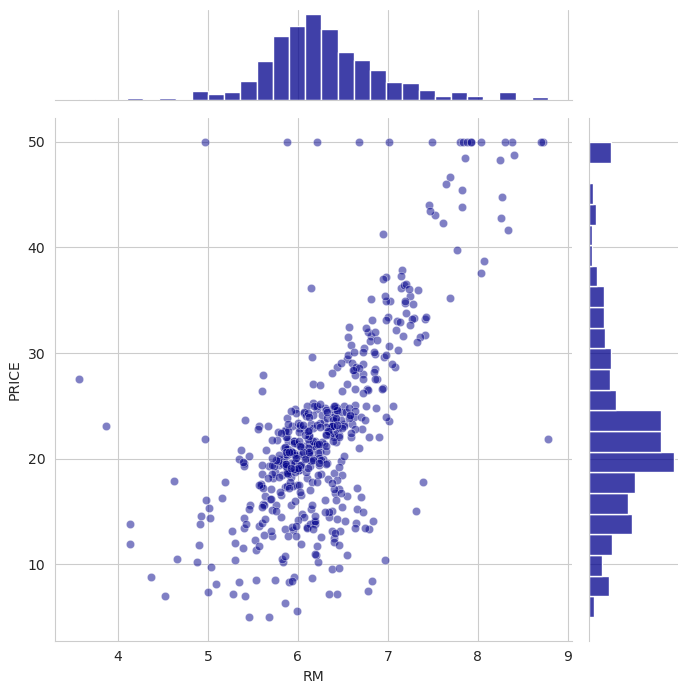

In [49]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data["RM"], 
                y=data["PRICE"], 
                height=7, 
                color='darkblue',
                joint_kws={'alpha':0.5})
plt.show()

The data suggests a moderate positive correlation between Price and Number of rooms. The high concentration of homes at the $50,000 mark is shown here again. It raises the question if there was some kind of cap on housing prices at that time.



### Split Training & Test Dataset

To make sure the model is working well, I split the dataset into Training and Test Data.

TARGET (Y) = PRICE

FEATURES (X) = all other data, excluding PRICE


In [50]:
target = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [54]:
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.1f}% of the total data.')

test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.1f}%.')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


### Multivariable linear Regression

How high is the r-squared for the regression on the training data?

In [56]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2f}')

Training data r-squared: 0.74


0.74 is a quite high r-squared and the linear model seems to be a good fit in general

### Coefficients of the Model
How much influence does the increase of the features have on the PRICE?

In [57]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

Coefficient
CRIM       -0.141892
ZN          0.064915
INDUS      -0.023352
CHAS        2.252588
NOX       -17.777791
RM          2.857717
AGE         0.019470
DIS        -1.527674
RAD         0.279946
TAX        -0.012454
PTRATIO    -0.794522
LSTAT      -0.610333

For example, in average how much more do you pay per room?

In [58]:
premium = regr_coef.loc['RM'].values[0] * 1000
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $2857.7


#### Analysis of the Estimated Values & Regression Residuals

I already know that the r-squared is quite high and hints towards a good fit of the regression model. But how big are the actual differences between the model's prediction and the actual values (=residuals)?



The first plot should be actual values (`y_train`) against the predicted value values: 



The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, you guessed it, our residuals 😊


The second plot should be the residuals against the predicted prices. Here's what we're looking for: 




In [59]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

#### Actual Prices (Y_train) vs. Predicted Prices (Y_hat)

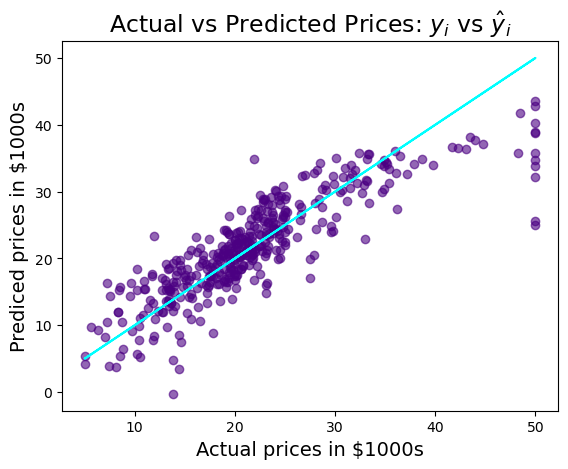

In [61]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices in $1000s', fontsize=14)
plt.ylabel('Prediced prices in $1000s', fontsize=14)
plt.show()

The data points mostly scatter around the regression line, however the houses around the $50,000 mark are clearly not fitting, which was expected. The model needs some tweaking.

#### Residual vs Predicted Prices

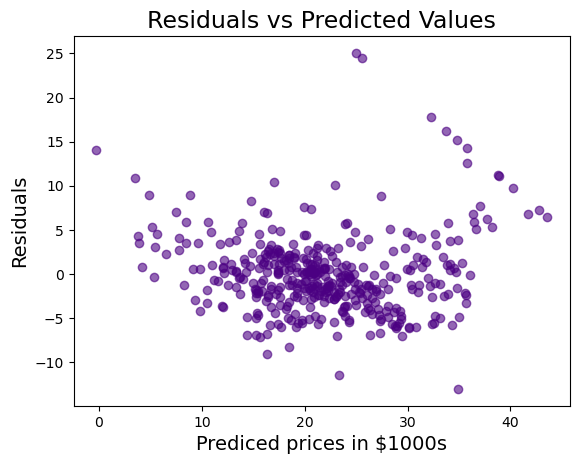

In [63]:
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Prediced prices in $1000s', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

There doesn't seem to be much of a pattern in the residuals, therefore the errors in our model seem to be random and the model is fitting rather well. But it this really the case? Sometimes it's hard to see a pattern.

To check, I will analyze the distributon of the residuals, especiallty the skew and the mean. A normal (and ideal) distribution would have a skewness and a mean of 0.

C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



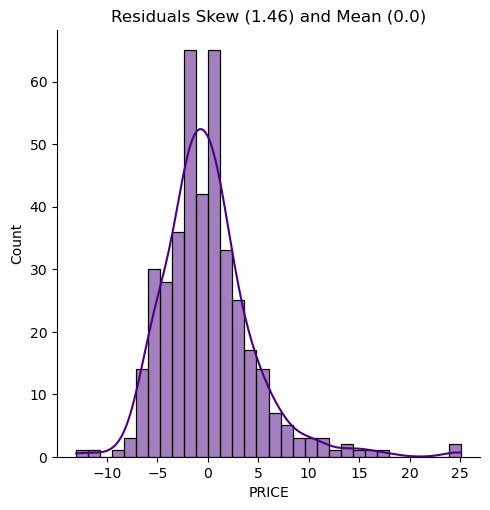

In [65]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

The residuals have a skewness of 1.46, which means that the model shows bias to one side. There is some room for improvement here.  

### Data Transformations for a Better Fit

I'll check if the target "PRICE" can be transformed to a log scale and make it a better fit with the linear model.

C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



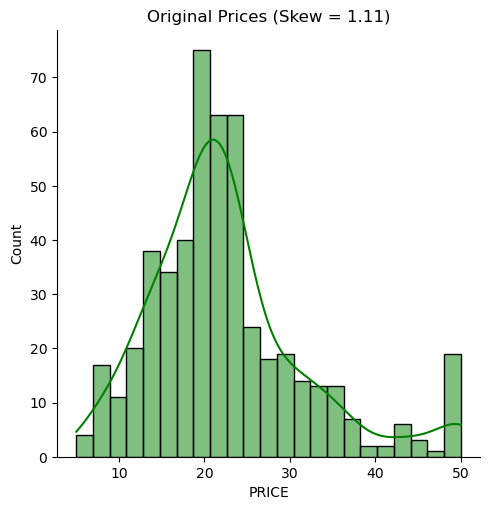

In [66]:
tgt_skew = data['PRICE'].skew()
sns.displot(data['PRICE'], kde='kde', color='green')
plt.title(f'Original Prices (Skew = {tgt_skew:.2f})')
plt.show()

C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



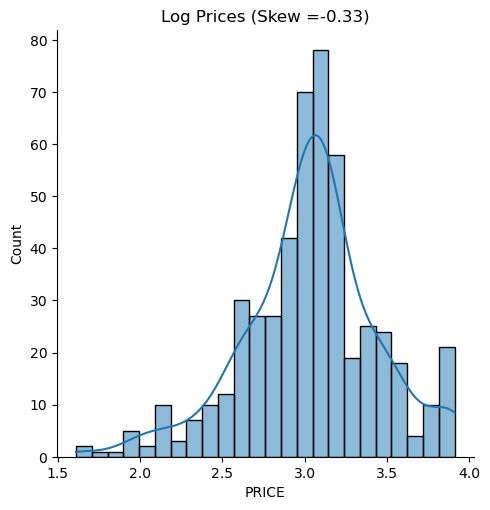

In [68]:
y_log = np.log(data['PRICE'])
sns.displot(y_log, kde=True)
plt.title(f'Log Prices (Skew ={y_log.skew():.2f})')
plt.show()

The log prices have a skew that's closer to zero.
Let's check if using log prices will improve the regression's r-squared and the model's residuals. 

### Regression using Log Prices


In [69]:
new_target = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2f}')

Training data r-squared: 0.78


This time the r-squared is 0.78 compared to 0.74 with the original prices. So far using log prices seems to be an improvement

### Coefficients with Log Prices

In [70]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

coef
CRIM    -0.011291
ZN       0.001657
INDUS    0.001317
CHAS     0.092894
NOX     -0.772098
RM       0.062076
AGE      0.000907
DIS     -0.049651
RAD      0.013479
TAX     -0.000662
PTRATIO -0.033630
LSTAT   -0.032687

### Regression with Log Prices & Residual Plots

#### Actual Prices vs. Predicted Log Prices

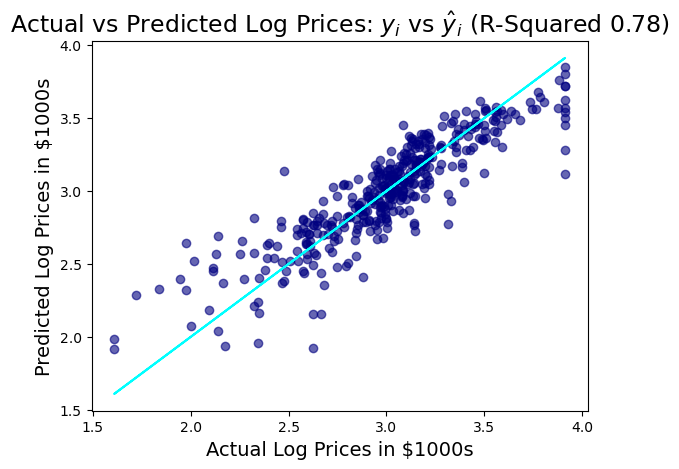

In [72]:
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2f})', fontsize=17)
plt.xlabel('Actual Log Prices in $1000s', fontsize=14)
plt.ylabel('Predicted Log Prices in $1000s', fontsize=14)
plt.show()

#### Residuals vs. Predicted Values (Log Prices)

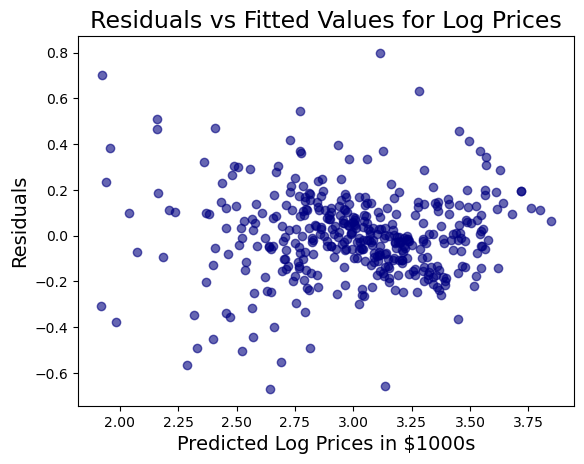

In [74]:
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices in $1000s', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


It's hard to see a difference here just by eye. The predicted values seems slightly closer to the cyan line (regression line) and the residuals seem to be random. But what does the data say?

C:\Users\laupo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



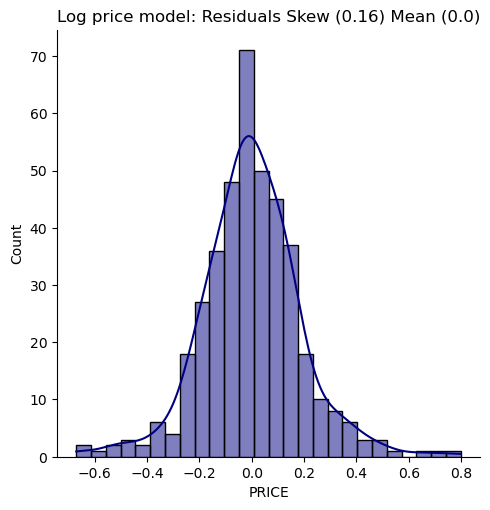

In [76]:
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

The new regression residuals have a skew of 0.09 compared to a skew of 1.46. The mean is still around 0. From both a residuals perspective and an r-squared perspective the model improved with the data transformation to log prices. 

# Compare Out of Sample Performance

To really test the model, I'll check the performance when using the test data, data that the model hasn't seen so far

In [77]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2f}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2f}')

Original Model Test Data r-squared: 0.68
Log Model Test Data r-squared: 0.76


The model has not been optimised for the testing data. So it is expected that the performance will be worse than on the training data. However, the r-squared for the Log Model remains high, so the model seems to be useful to predict Home Prices.

## Predicting a Property's Value using the Regression Coefficients


I start by predicting the price for a property with average values over all features

In [80]:
# average values of all features
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

CRIM         ZN      INDUS     CHAS       NOX        RM        AGE  \
0  3.613524  11.363636  11.136779  0.06917  0.554695  6.284634  68.574901   

        DIS       RAD         TAX    PTRATIO      LSTAT  
0  3.795043  9.549407  408.237154  18.455534  12.653063

In [84]:
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.2f}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.0f}')

The log price estimate is $3.24
The property is estimated to be worth $25633


A property with an average value for all the features has a value of $20,693. 

What would be the price for a House next to the river, with 8 rooms, and average of 20 students per classroom and 5 miles away from the employment centers? With pollution in the higher quartile and poverty in the lower quartile?

In [82]:
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75)
amount_of_poverty =  data.LSTAT.quantile(q=0.25)

In [83]:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [85]:

log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.2f}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.0f}')

The log price estimate is $3.24
The property is estimated to be worth $25633
